<a href="https://colab.research.google.com/github/EllieV01/uni_docs/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
data_mush = pd.read_csv('training_mush.csv')

In [ ]:
data_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


In [ ]:
X = data_mush.drop(['class'], axis = 1)
y = data_mush['class']

In [ ]:
clf_rf = RandomForestClassifier(random_state=0)

In [ ]:
parametrs = {'n_estimators' : range(10, 51, 10), 
             'max_depth' : range(1, 13, 2),
             'min_samples_leaf' : range(1, 8),
             'min_samples_split' : range(2, 10, 2)}

In [ ]:
grid = GridSearchCV(clf_rf, parametrs, cv = 3)

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
best_clf = grid.best_estimator_

In [ ]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
feature_importances = best_clf.feature_importances_

In [ ]:
feature_importances_df = pd.DataFrame({'features' : list(X),
                                       'feature_importances' : feature_importances})

In [ ]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [ ]:
test_mush = pd.read_csv('testing_mush.csv')

In [ ]:
test_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,1,2,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,0,2,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,0,2,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,0,2,1,6,6,0,2,1,0,7,4,4


In [ ]:
y_pred = best_clf.predict(test_mush)

In [ ]:
y_pred.sum()

976

In [ ]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [ ]:
y_true = pd.read_csv('testing_y_mush.csv')

In [ ]:
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_true, y_pred)

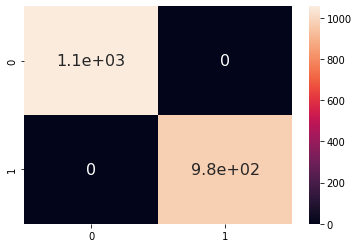

In [ ]:
import seaborn as sns

sns.heatmap(m, annot=True,annot_kws={"size": 16})